In [1]:
from mne.connectivity import spectral_connectivity

In [ ]:
import numpy as np

In [29]:
high_isc = np.load('Generated_Data/high_isc_averaged_with_cov.npz')['high_isc_averaged']
low_isc = np.load('Generated_Data/low_isc_averaged_with_cov.npz')['low_isc_averaged']
high_isc = high_isc.swapaxes(1,2)
low_isc = low_isc.swapaxes(1,2)

In [30]:
high_isc.shape

(10, 500, 360)

In [31]:
from nilearn.connectome import ConnectivityMeasure

Spatial connectivity 

In [32]:
conn_h = ConnectivityMeasure(kind='tangent')
conn_h.fit(high_isc)

conn_l = ConnectivityMeasure(kind='tangent')
conn_l.fit(low_isc)

/homes/v20subra/.local/lib/python3.8/site-packages/nilearn/connectome/connectivity_matrices.py:194: UserWarning: Maximum number of iterations 30 reached without getting to the requested tolerance level 1e-07.
  warnings.warn("Maximum number of iterations {0} reached without "


ConnectivityMeasure(kind='tangent')

In [7]:
from nilearn.plotting import plot_matrix

/homes/v20subra/.local/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [ ]:
rois = np.load('GSP/hcp/regions.npy')

In [34]:
labels[385]

['Somatomotor',
 'Cingulo-Oper',
 'Cingulo-Oper',
 'Cingulo-Oper',
 'Language',
 'Somatomotor',
 'Visual2',
 'Visual2',
 'Language',
 'Somatomotor']

In [35]:
labels = [roi[1] for roi in rois]

In [36]:
from matplotlib import pyplot as plt 

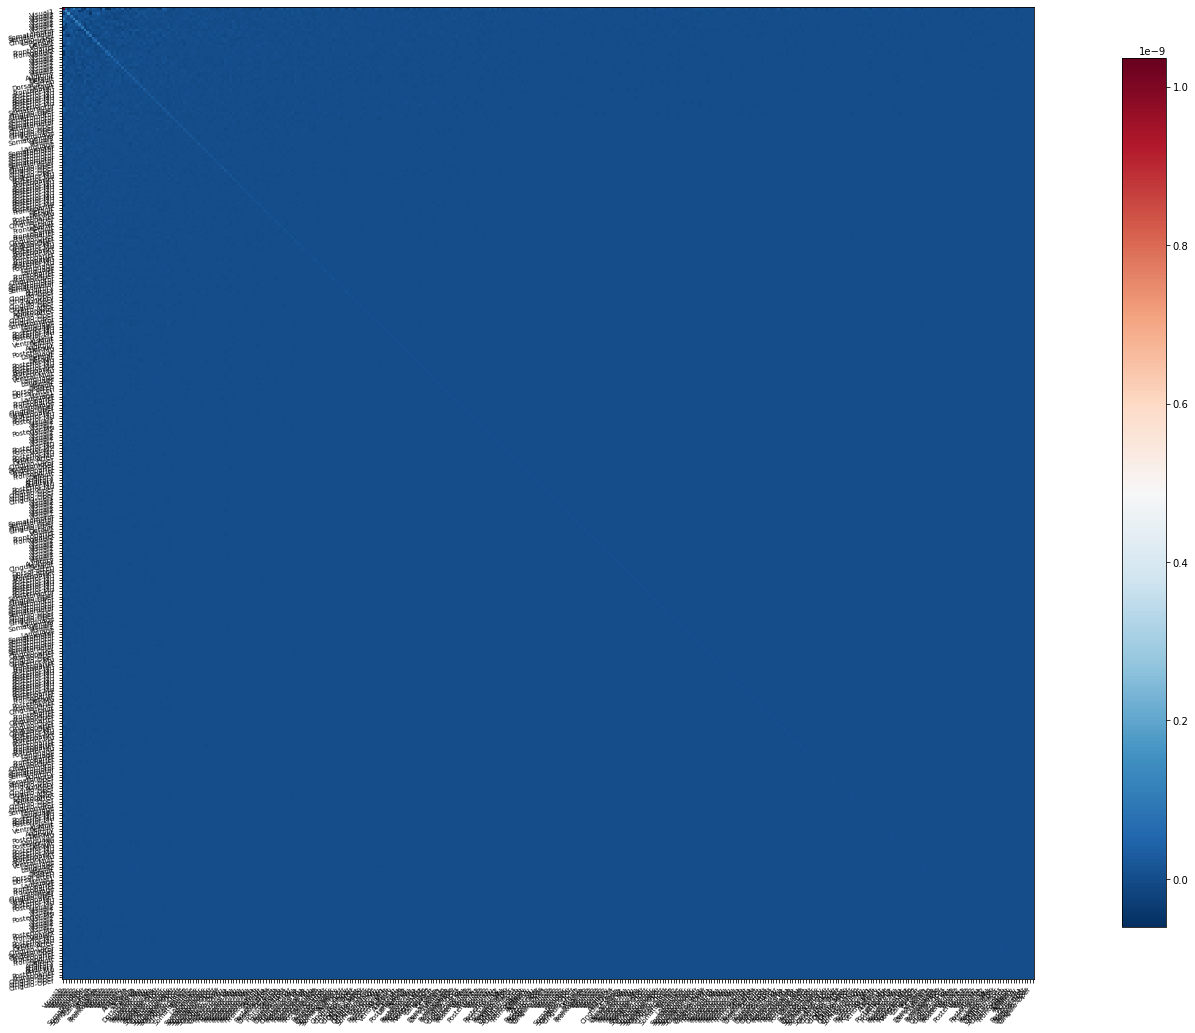

In [37]:
f = plt.figure(figsize=(20,20))

plot_matrix(conn_l.mean_,labels=labels,reorder=False,figure=f)

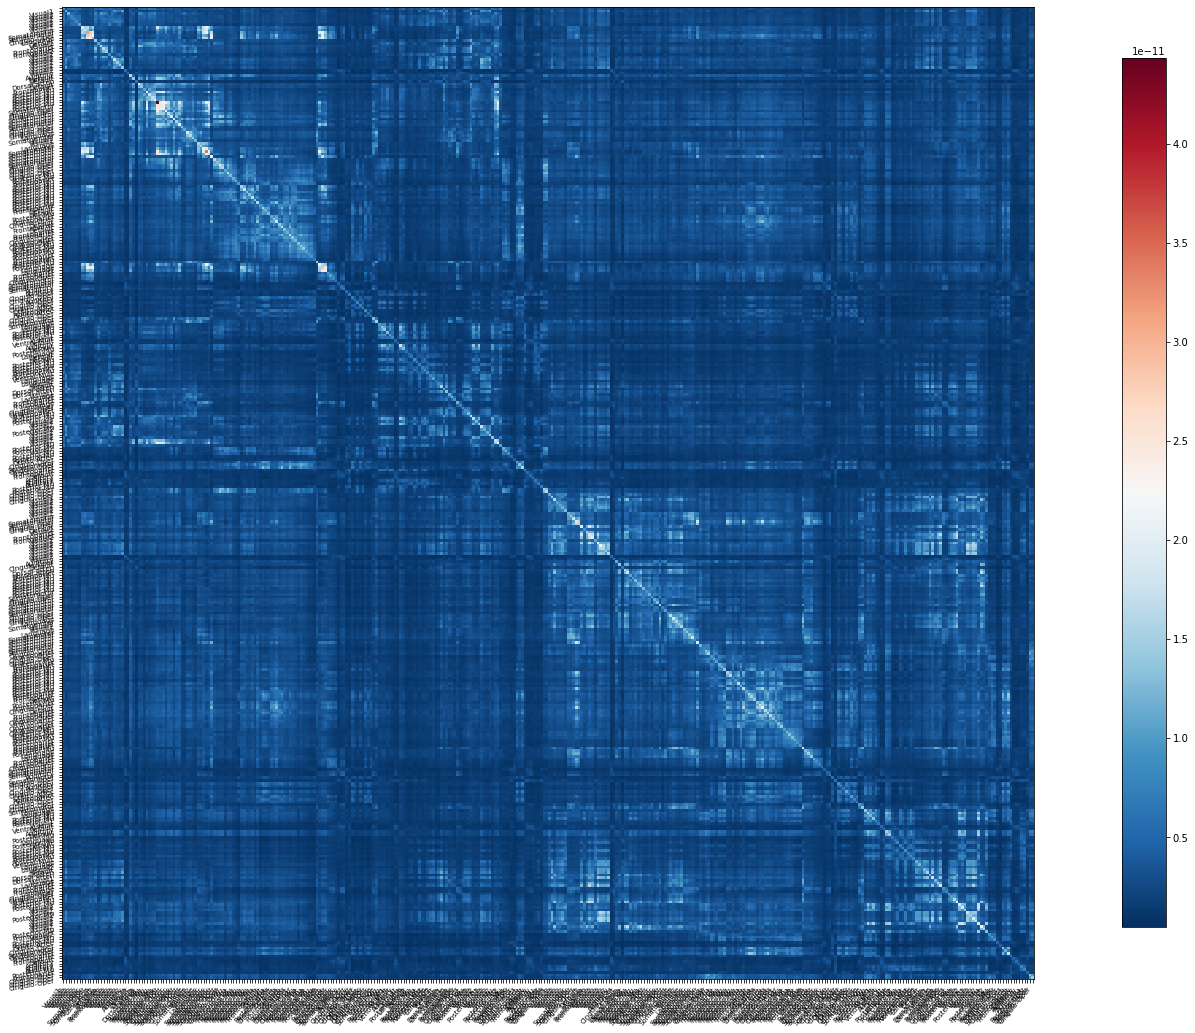

In [38]:
f = plt.figure(figsize=(20,20))

plot_matrix(conn_h.mean_,labels=labels,reorder=False,figure=f)

In [39]:
from nilearn.regions import signals_to_img_labels

Intersubject "connectivity"

In [42]:
def calc_spectral_conn_roi(mat):
    avg_curroi = np.zeros(360)
    for curroi in range(360):
        curts = np.expand_dims(mat[:,:,curroi],0)
        con,freqs,_,_,_ = spectral_connectivity(data=curts,sfreq=500,faverage=True,fmax=40,method=['imcoh'])
        avg_curroi[curroi] = np.mean(con[:,:,0])
        
    return avg_curroi

In [41]:
from tqdm import tqdm

In [13]:
spectral_connectivity?

In [43]:
def calc_spectral_conn_roi_null(mat,nperms = 500):
    all_avg = []
    for perm in (range(nperms)):
        curperm = np.random.permutation(mat.shape[1])                        
        avg_curroi = np.zeros(360)
        for curroi in range(360):
            curts = np.expand_dims(mat[:,curperm,curroi],0)
            con,freqs,_,_,_ = spectral_connectivity(data=curts,sfreq=500,faverage=True,fmax=40,method=['imcoh'])
            avg_curroi[curroi] = np.mean(con[:,:,0])
        all_avg.append(avg_curroi)
    return np.mean(np.stack(all_avg),axis=0)

In [ ]:
isc_perm = calc_spectral_conn_roi_null(low_isc,nperms=2)

In [45]:
spectral_high_isc = calc_spectral_conn_roi(high_isc)
spectral_low_isc = calc_spectral_conn_roi(low_isc)

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computat

    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 co

    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for 

    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary 

only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity compu

    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (50

    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPS

[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivi

    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 co

    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for 

    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary 

only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity compu

    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (50

    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPS

[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivi

    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 co

    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for 

    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary 

only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity compu

    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (50

    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPS

[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivi

    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 co

    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for 

    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary 

only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity compu

    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (50

    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPS

[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivi

    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 co

    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for 

    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary 

only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity compu

    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (50

    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPS

[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivi

    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 co

    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for 

    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary 

only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity compu

    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (50

    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPS

[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivi

    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 co

    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.998s for estimation (500 points)
    frequencies: 5.0Hz..40.0Hz (36 points)
    connectivity scores will be averaged for 

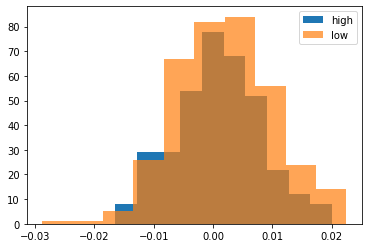

In [46]:
plt.hist(spectral_high_isc)
plt.hist(spectral_low_isc,alpha = 0.7)
plt.legend(['high','low','perm'])

In [21]:
high_isc_img = signals_to_img_labels(np.expand_dims(abs(spectral_high_isc),0),'GSP/Glasser_masker.nii.gz')
low_isc_img = signals_to_img_labels(np.expand_dims(abs(spectral_low_isc),0),'GSP/Glasser_masker.nii.gz')
isc_perm_img = signals_to_img_labels(np.expand_dims(abs(isc_perm),0),'GSP/Glasser_masker.nii.gz')


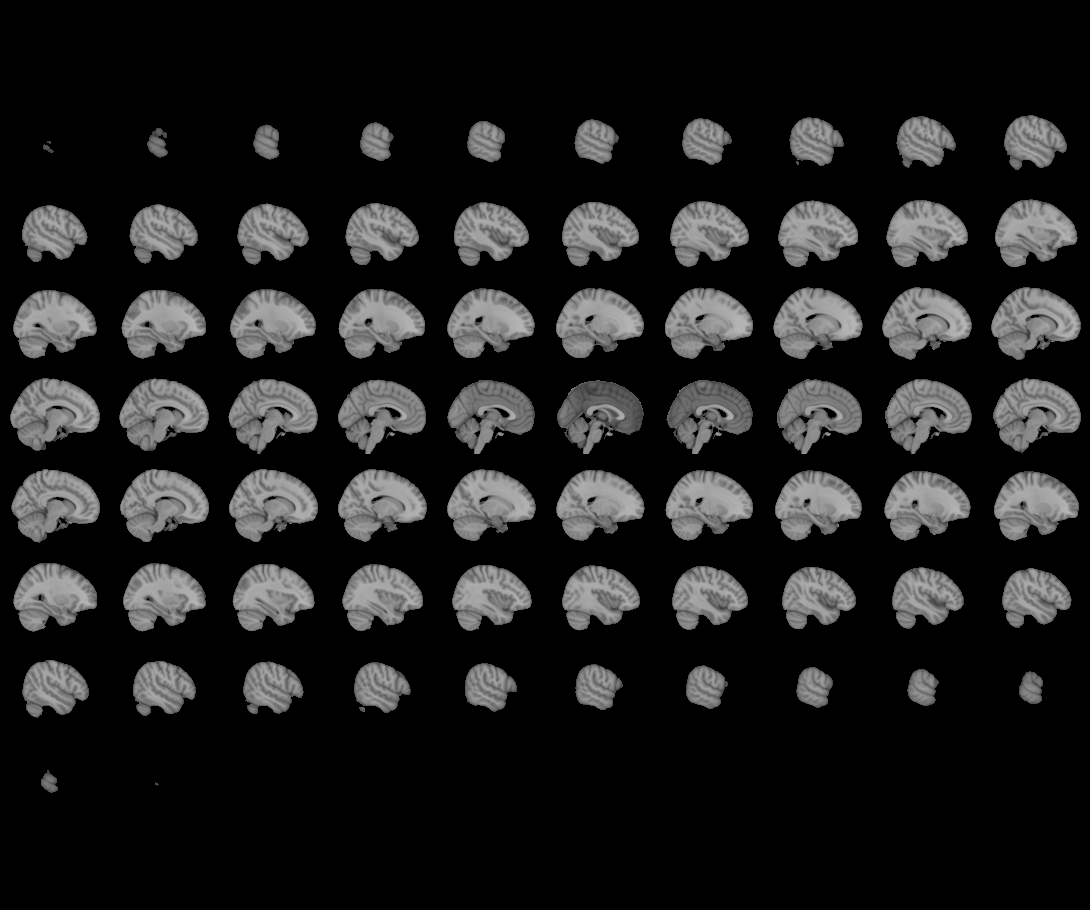
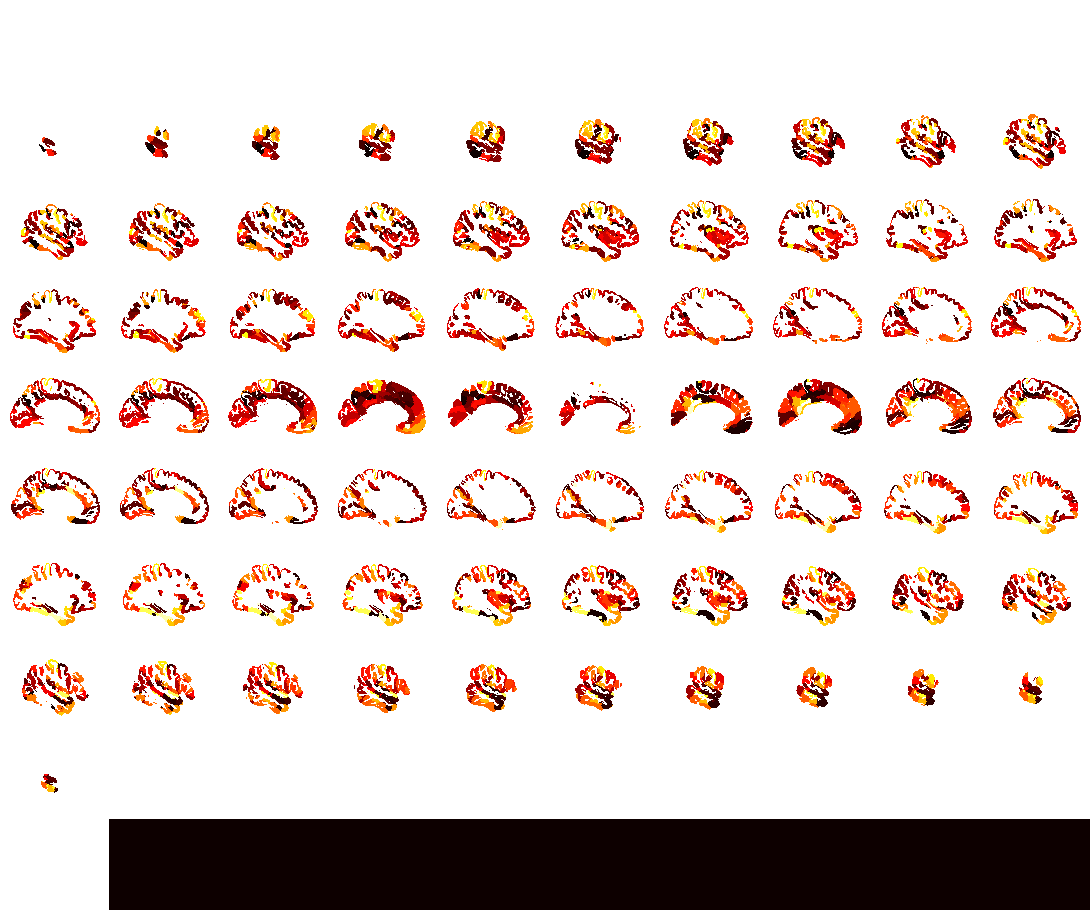

In [22]:
from nilearn.plotting import view_img

view = view_img(high_isc_img,title='High')
view


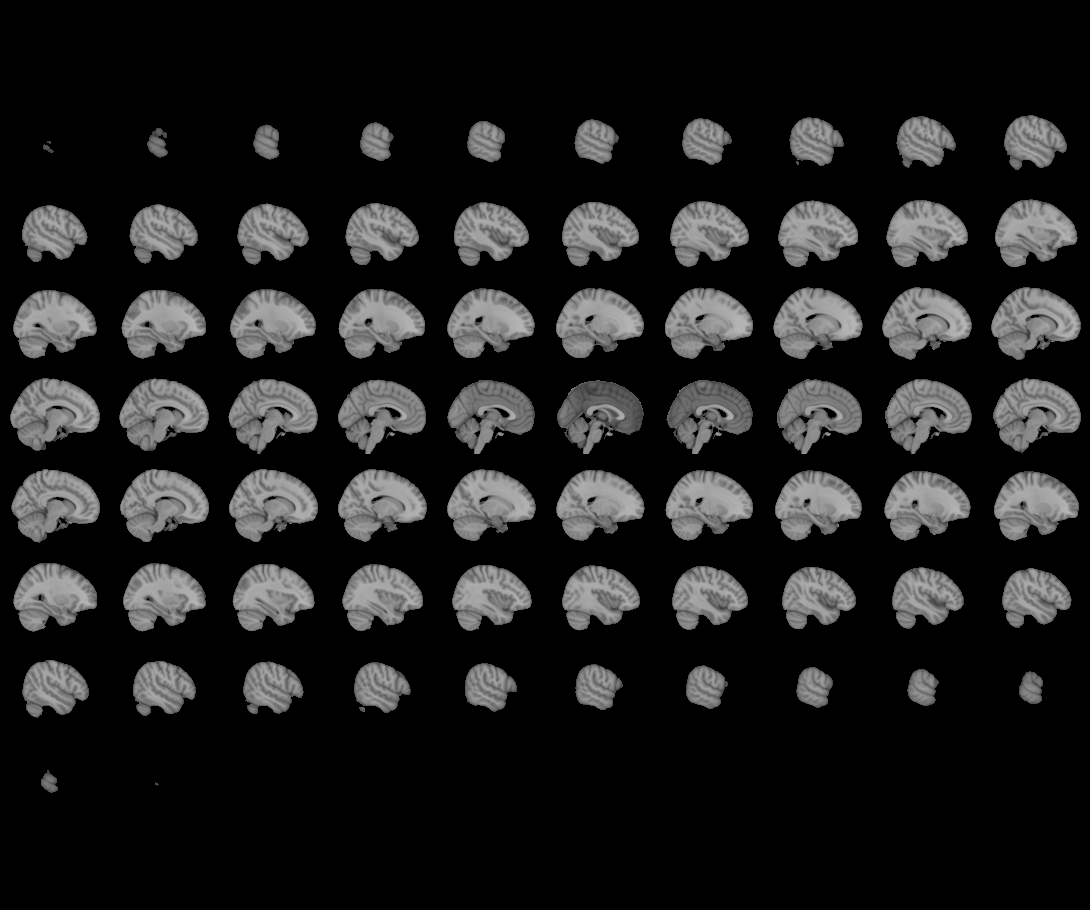
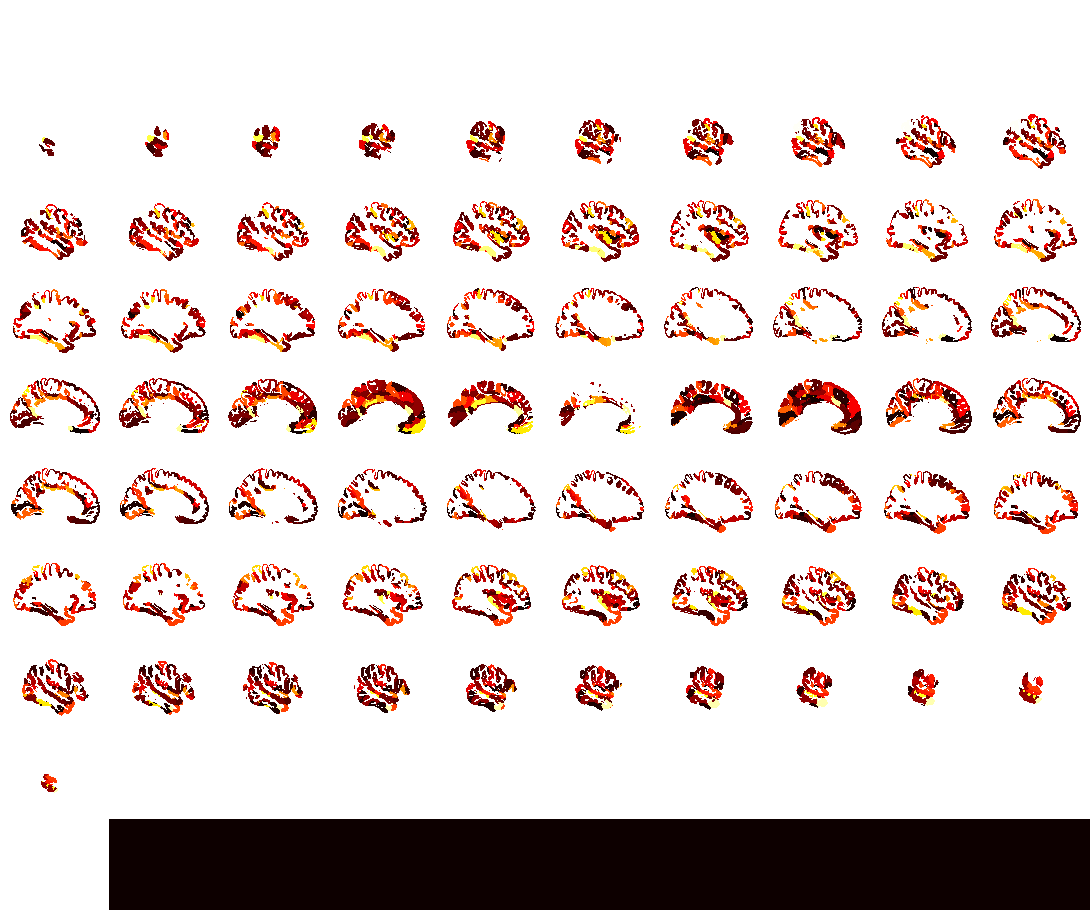

In [23]:
from nilearn.plotting import view_img

view = view_img(low_isc_img,title='Low')
view


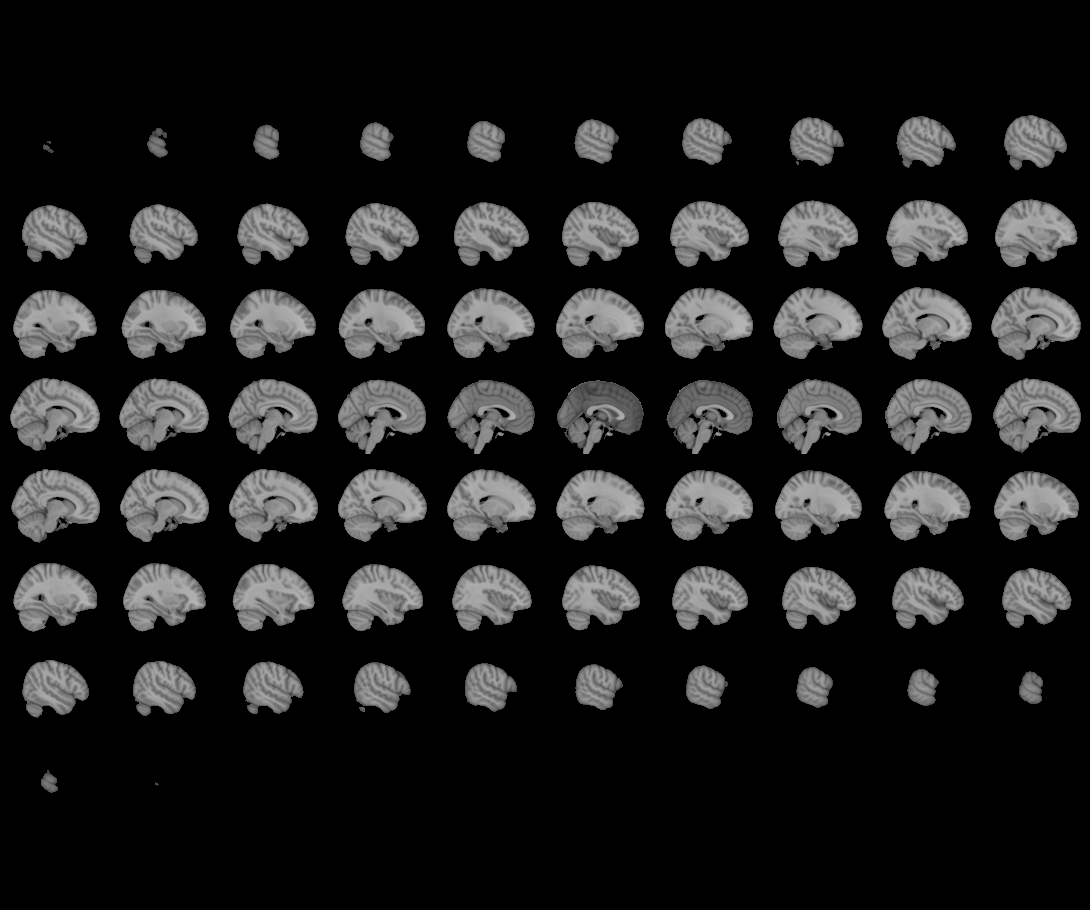
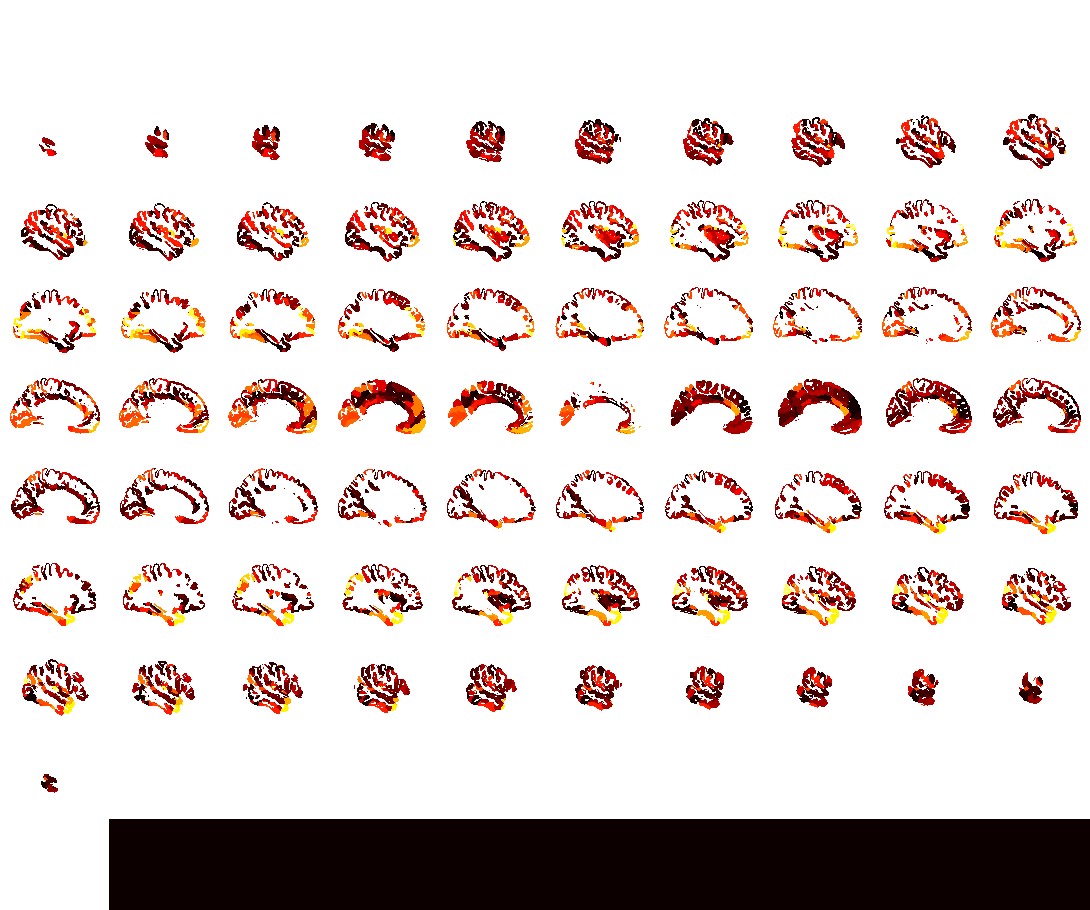

In [30]:
from nilearn.plotting import view_img

view = view_img(isc_perm_img,title='Perm')
view

In [40]:
###shape=(n_epochs, n_signals, n_times)

q = [rois[i][1] for i in range(360)]

In [46]:
np.where( np.array(q) == 'Auditory')

(array([ 23, 102, 103, 106, 123, 172, 173, 174, 203, 282, 286, 303, 352,
        353, 354]),)

In [57]:
np.savez('Generated_Data/connectivity_high_isc.npz',connectivity_high_isc = conn_h.mean_)
np.savez('Generated_Data/connectivity_low_isc.npz',connectivity_low_isc = conn_l.mean_)


In [60]:
conn_h

ConnectivityMeasure()